# 전처리(Pre_processing)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

train = pd.read_csv('/content/t_train.csv')
test = pd.read_csv('/content/t_test.csv')

In [2]:
# 기초 통계
# 평균 = 생존율
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# 초기 상관 관계
train.corr()

<ipython-input-3-06a0af049e27>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


* 기초 통계와 상관도는 전처리 후 다시 확인해보기

## Name

- 이름 앞에 Mr, Mrs 등을 통해 결혼 여부를 알 수 있음 → 이 명칭을 추출하여 'Title'이라는 컬럼에 저장

- 사전적 의미에 의해 Miss, Mr, Mrs 분류
- 남은 Dor, Rev, Master은 sex 확인하여 분류

In [4]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')
train['Title'] = train['Title'].replace(['Major', 'Col', 'Sir', 'Don', 'Jonkheer', 'Capt'],  'Mr')
train['Title'] = train['Title'].replace(['Lady', 'Countess', 'Dona', 'Mme'], 'Mrs')

In [5]:
train['Title'].value_counts()

Mr        525
Miss      185
Mrs       128
Master     40
Dr          7
Rev         6
Name: Title, dtype: int64

In [6]:
train[train['Title']=='Dr']['Sex']

245      male
317      male
398      male
632      male
660      male
766      male
796    female
Name: Sex, dtype: object

In [7]:
train.drop(796, axis=0, inplace=True)

In [8]:
train[train['Title']=='Dr']['Sex']

245    male
317    male
398    male
632    male
660    male
766    male
Name: Sex, dtype: object

In [9]:
train[train['Title']=='Rev']['Sex']

149    male
150    male
249    male
626    male
848    male
886    male
Name: Sex, dtype: object

In [10]:
train[train['Title']=='Master']['Sex']

7      male
16     male
50     male
59     male
63     male
65     male
78     male
125    male
159    male
164    male
165    male
171    male
176    male
182    male
183    male
193    male
261    male
278    male
305    male
340    male
348    male
386    male
407    male
445    male
480    male
489    male
549    male
709    male
751    male
755    male
787    male
788    male
802    male
803    male
819    male
824    male
827    male
831    male
850    male
869    male
Name: Sex, dtype: object

In [11]:
train['Title'] = train['Title'].replace(['Dr', 'Rev', 'Master'],  'Mr')

In [12]:
train['Title'].value_counts()

Mr      577
Miss    185
Mrs     128
Name: Title, dtype: int64

In [13]:
# 컴퓨터가 이해할 수 있도록 카테고리별 번호 부여 -> cat.codes
# Miss = 1 / Mr = 2 / Mrs = 3 / Other = 4
train['Title_label'] = train['Title'].astype('category').cat.codes

train[['Title','Title_label']]

,Title,Title_label
0,Mr,1
1,Mrs,2
2,Miss,0
3,Mrs,2
4,Mr,1
...,...,...
886,Mr,1
887,Miss,0
888,Miss,0
889,Mr,1


* 예측할 test파일에도 같은 작업 실행

In [14]:
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

test['Title'] = test['Title'].replace(['Mlle', 'Ms'], 'Miss')
test['Title'] = test['Title'].replace(['Major', 'Col', 'Sir', 'Don', 'Jonkheer', 'Capt', 'Dr', 'Rev', 'Master'],  'Mr')
test['Title'] = test['Title'].replace(['Lady', 'Countess', 'Dona', 'Mme'], 'Mrs')

test['Title'].value_counts()

Mr      266
Miss     79
Mrs      73
Name: Title, dtype: int64

In [15]:
test['Title_label'] = test['Title'].astype('category').cat.codes

test[['Title','Title_label']]

,Title,Title_label
0,Mr,1
1,Mrs,2
2,Mr,1
3,Mr,1
4,Mrs,2
...,...,...
413,Mr,1
414,Mrs,2
415,Mr,1
416,Mr,1


* for문으로 train, test 파일 두 개 다 카테고리화 진행하기

In [16]:
전체데이터 = [train, test]

In [17]:
for 데이터 in 전체데이터:
    데이터['Title'] = 데이터['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [18]:
mapping_data={
    'Don':0,
    'Rev':0,
    'Capt':0,
    'Jonkheer':0,
    'Mr':0,
    'Dr':0,
    'Major':0,
    'Col':0,
    'Master':0,
    'Sir':0,
    'Miss':1,
    'Mlle':1,
    'Ms':1,
    'Mrs':2,
    'Mme':2,
    'Lady':2,
    'Countess':2
}
for 데이터 in 전체데이터:
    데이터['Title']=데이터['Title'].map(mapping_data)

In [19]:
# 불필요 데이터 지우기
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Survived     890 non-null    int64  
 2   Pclass       890 non-null    int64  
 3   Sex          890 non-null    object 
 4   Age          713 non-null    float64
 5   SibSp        890 non-null    int64  
 6   Parch        890 non-null    int64  
 7   Ticket       890 non-null    object 
 8   Fare         890 non-null    float64
 9   Cabin        203 non-null    object 
 10  Embarked     888 non-null    object 
 11  Title        890 non-null    int64  
 12  Title_label  890 non-null    int8   
dtypes: float64(2), int64(6), int8(1), object(4)
memory usage: 91.3+ KB


## Age

* 결측치가 있는 age는 그룹별 평균값으로 채워주기

In [21]:
train["Age"].fillna(train.groupby("Sex")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Sex")["Age"].transform("median"), inplace=True)

In [22]:
# Age 결측치 다시 확인해보기
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Survived     890 non-null    int64  
 2   Pclass       890 non-null    int64  
 3   Sex          890 non-null    object 
 4   Age          890 non-null    float64
 5   SibSp        890 non-null    int64  
 6   Parch        890 non-null    int64  
 7   Ticket       890 non-null    object 
 8   Fare         890 non-null    float64
 9   Cabin        203 non-null    object 
 10  Embarked     888 non-null    object 
 11  Title        890 non-null    int64  
 12  Title_label  890 non-null    int8   
dtypes: float64(2), int64(6), int8(1), object(4)
memory usage: 91.3+ KB


- Age도 카테고리화
```
for 데이터 in 전체데이터:
    데이터.loc[ 데이터['Age'] <= 16, 'Age'] = 0
    데이터.loc[(데이터['Age'] > 16) & (데이터['Age'] <= 26), 'Age'] = 1
    데이터.loc[(데이터['Age'] > 26) & (데이터['Age'] <= 36), 'Age'] = 2
    데이터.loc[(데이터['Age'] > 36) & (데이터['Age'] <= 62), 'Age'] = 3
    데이터.loc[ 데이터['Age'] > 62, 'Age'] = 4
```

In [23]:
# 불필요 데이터 지우기
train.drop('Title', axis=1, inplace=True)
test.drop('Title', axis=1, inplace=True)

In [24]:
# 위처럼 두 번 하는 것을 하나로 묶어서 카테고리화 하기
전체데이터 = [train, test]

In [25]:
for 데이터 in 전체데이터:
    데이터.loc[ 데이터['Age'] <= 16, 'Age'] = 0
    데이터.loc[(데이터['Age'] > 16) & (데이터['Age'] <= 26), 'Age'] = 1
    데이터.loc[(데이터['Age'] > 26) & (데이터['Age'] <= 36), 'Age'] = 2
    데이터.loc[(데이터['Age'] > 36) & (데이터['Age'] <= 62), 'Age'] = 3
    데이터.loc[ 데이터['Age'] > 62, 'Age'] = 4

In [26]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_label
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,S,1


In [27]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_label
0,892,3,male,2.0,0,0,330911,7.8292,NaN,Q,1
1,893,3,female,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,3.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,male,2.0,0,0,315154,8.6625,NaN,S,1
4,896,3,female,1.0,1,1,3101298,12.2875,NaN,S,2


## Fare

- Fare 값은 이미 숫자이지만 단순화하기 위해 pd.qcut을 이용하여 요금별 구간을 5구간으로 나누어서 아래와 같이 진행

In [28]:
for 데이터 in 전체데이터:
    데이터['Fare_bin'] = pd.qcut(train['Fare'], 5)
    데이터['Fare_label'] = 데이터['Fare_bin'].astype('category').cat.codes

In [29]:
# 나누어진 값들을 라벨링하여 진행
train[['Fare','Fare_bin','Fare_label']]

,Fare,Fare_bin,Fare_label
0,7.2500,"(-0.001, 7.854]",0
1,71.2833,"(39.688, 512.329]",4
2,7.9250,"(7.854, 10.5]",1
3,53.1000,"(39.688, 512.329]",4
4,8.0500,"(7.854, 10.5]",1
...,...,...,...
886,13.0000,"(10.5, 21.317]",2
887,30.0000,"(21.317, 39.688]",3
888,23.4500,"(21.317, 39.688]",3
889,30.0000,"(21.317, 39.688]",3


In [30]:
test[['Fare','Fare_bin','Fare_label']]

,Fare,Fare_bin,Fare_label
0,7.8292,"(-0.001, 7.854]",0
1,7.0000,"(39.688, 512.329]",4
2,9.6875,"(7.854, 10.5]",1
3,8.6625,"(39.688, 512.329]",4
4,12.2875,"(7.854, 10.5]",1
...,...,...,...
413,8.0500,"(-0.001, 7.854]",0
414,108.9000,"(7.854, 10.5]",1
415,7.2500,"(7.854, 10.5]",1
416,8.0500,"(21.317, 39.688]",3


In [31]:
# 불필요한 데이터 삭제
for 데이터 in 전체데이터:
    데이터.drop('Fare', axis=1, inplace=True)
    데이터.drop('Fare_bin', axis=1, inplace=True)

## Family

In [32]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [33]:
# 모든 가족 + '나' -> FamilySize 컬럼 생성
mapping_data = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for 데이터 in 전체데이터:
    데이터['FamilySize'] = 데이터['FamilySize'].map(mapping_data)

In [34]:
# 불필요 데이터 지우기
for 데이터 in 전체데이터:
    데이터.drop('SibSp', axis=1, inplace=True)
    데이터.drop('Parch', axis=1, inplace=True)

## Embarked

In [35]:
# 결측치는 빈도수가 많은 'S'로 채우기
for 데이터 in 전체데이터:
    데이터['Embarked'] = 데이터['Embarked'].fillna('S')

In [36]:
# 선착장별로 0, 1, 2 값 부여 -> 매핑 사용
mapping_data = {"S": 0, "C": 1, "Q": 2}
for 데이터 in 전체데이터:
    데이터['Embarked'] = 데이터['Embarked'].map(mapping_data)

## Sex

In [37]:
# 매핑이 아닌 카테고리로 변환
test['Sex'] = test['Sex'].astype('category').cat.codes
train['Sex'] = train['Sex'].astype('category').cat.codes

## Drop Data

In [38]:
# 불필요한 데이터 삭제
for 데이터 in 전체데이터:
    데이터.drop('Ticket', axis=1, inplace=True)
    데이터.drop('Cabin', axis=1, inplace=True)
    데이터.drop('PassengerId', axis=1, inplace=True)

In [39]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,Title_label,Fare_label,FamilySize
0,0,3,1,1.0,0,1,0,0.4
1,1,1,0,3.0,1,2,4,0.4
2,1,3,0,1.0,0,0,1,0.0
3,1,1,0,2.0,0,2,4,0.4
4,0,3,1,2.0,0,1,1,0.0


In [40]:
test.head()

,Pclass,Sex,Age,Embarked,Title_label,Fare_label,FamilySize
0,3,1,2.0,2,1,0,0.0
1,3,0,3.0,0,2,4,0.4
2,2,1,3.0,2,1,1,0.0
3,3,1,2.0,0,1,4,0.0
4,3,0,1.0,0,2,1,0.8


* 처음에 그렸던 상관도분석 다시 실행해보기

In [41]:
train.corr()

,Survived,Pclass,Sex,Age,Embarked,Title_label,Fare_label,FamilySize
Survived,1.000000,-0.337020,-0.542471,-0.074057,0.107738,-0.024151,0.316426,0.017456
Pclass,-0.337020,1.000000,0.129828,-0.285049,0.044771,-0.089761,-0.704265,0.065111
Sex,-0.542471,0.129828,1.000000,0.086773,-0.117579,0.147493,-0.243522,-0.202087
Age,-0.074057,-0.285049,0.086773,1.000000,0.035202,0.279049,0.087134,-0.238109
Embarked,0.107738,0.044771,-0.117579,0.035202,1.000000,-0.139070,-0.087888,-0.080669
Title_label,-0.024151,-0.089761,0.147493,0.279049,-0.139070,1.000000,0.105483,0.016091
Fare_label,0.316426,-0.704265,-0.243522,0.087134,-0.087888,0.105483,1.000000,0.419188
FamilySize,0.017456,0.065111,-0.202087,-0.238109,-0.080669,0.016091,0.419188,1.000000


<Axes: >

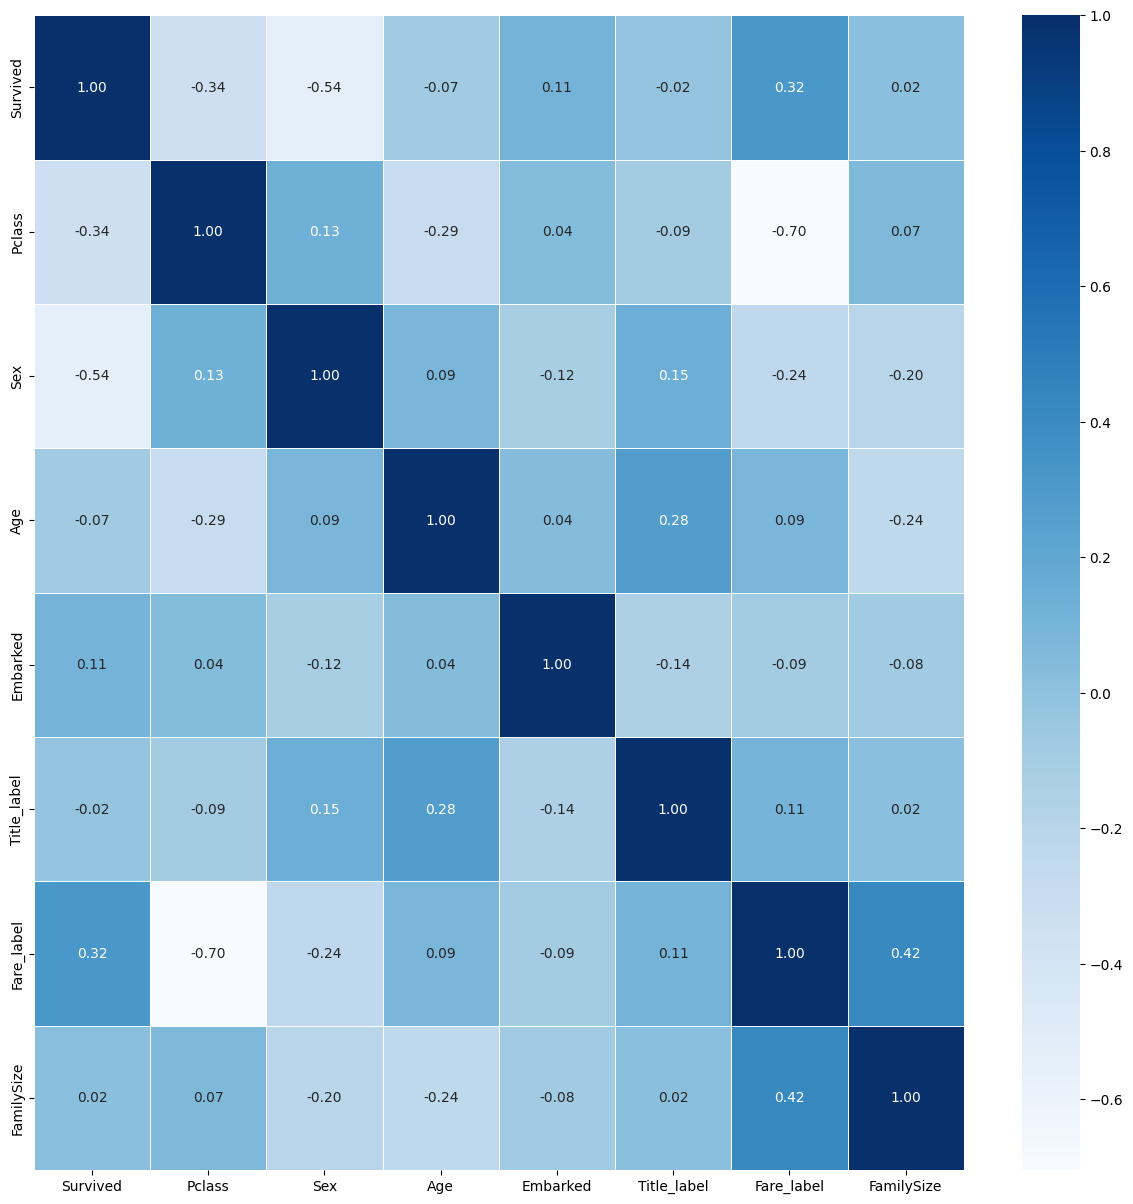

In [42]:
plt.figure(figsize=(15,15))
sns.heatmap(data=train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

# Modelling

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((890, 7), (890,))

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## KNN

In [65]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
prediction = clf.predict(test)

NotFittedError: ignored

In [66]:
# KNN 점수 확인
round(np.mean(score)*100, 2)

82.92

## Random Forest

In [49]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [50]:
# Random Forest 점수 확인
round(np.mean(score)*100, 2)

80.45

## Naive Bayes

In [51]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [52]:
# Naive Bayes 점수 확인
round(np.mean(score)*100, 2)

77.53

## SVC

In [67]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
clf = KNeighborsClassifier(n_neighbors = 13)

In [68]:
round(np.mean(score)*100,2)

80.9

## Perceptron

In [55]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(train_data, target)
Y_pred = perceptron.predict(train_data)
acc_perceptron = round(perceptron.score(train_data, target) * 100, 2)
acc_perceptron

80.9

## DecisionTree

In [69]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
clf = KNeighborsClassifier(n_neighbors = 13)

In [70]:
# decision tree 점수 확인
round(np.mean(score)*100, 2)

81.46

## XGBoost

In [58]:
import xgboost as xgb

clf = xgb.XGBClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [59]:
round(np.mean(score)*100, 2)

82.25

In [60]:
#test_ori = pd.read_csv('/content/t_test.csv')

In [61]:
#제출값 = pd.DataFrame({"PassengerId": test_ori["PassengerId"],"Survived": prediction})
#제출값.to_csv('titanic_ver_1.csv', index=False)

In [62]:
#제출값 # 영문명으로 변경 필요

* 저장한 파일은 캐글에 올려서 점수 확인해보기